<a href="https://colab.research.google.com/github/rohitdanda/MyCodes/blob/master/SimpleRnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np

In [0]:
x = np.linspace(0,50,501)


In [0]:
y = np.sin(x)

In [0]:
import pandas as pd

data_frame = pd.DataFrame(data=y,index=x,columns=['Sine'])

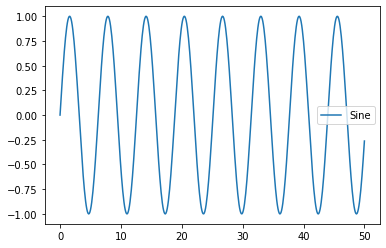

In [0]:
data_frame.plot()

In [0]:
test_percent = 0.1
test_index = np.round(len(data_frame)*test_percent)
test_vaue = int(len(data_frame)-test_index)
train = data_frame.iloc[:test_vaue]
test = data_frame.iloc[test_vaue:]

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(train)
scaler_train = scaler.transform(train)

In [0]:
scaler_test = scaler.transform(test)

In [0]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

length_train = 50
prediction_length = 1

generator = TimeseriesGenerator(scaler_train,scaler_train,length=length_train,batch_size=prediction_length)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense

model = Sequential([
                    SimpleRNN(50,input_shape=(50,1)),
                    Dense(1)
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='mse')

In [0]:
model.fit(generator,epochs=5)

Epoch 1/5
401/401 [==============================] - 3s 7ms/step - loss: 0.0155
Epoch 2/5
401/401 [==============================] - 3s 7ms/step - loss: 2.6280e-04
Epoch 3/5
401/401 [==============================] - 3s 7ms/step - loss: 9.0245e-04
Epoch 4/5
401/401 [==============================] - 3s 8ms/step - loss: 3.9648e-05
Epoch 5/5
401/401 [==============================] - 3s 7ms/step - loss: 6.8013e-04


In [0]:
loss = pd.DataFrame(model.history.history)

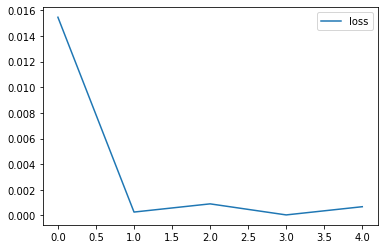

In [0]:
loss.plot()

In [0]:
test_prediciton =[]
first_eval = scaler_train[-50:]
current_batch = first_eval.reshape((1,50,1))

In [0]:
for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_prediciton.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
  

In [0]:
true_predicition = scaler.inverse_transform(test_prediciton)
test['prediciton']=true_predicition

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


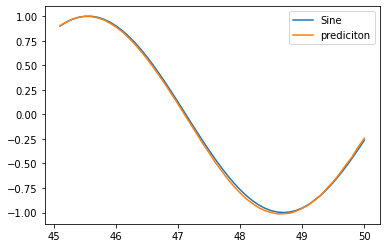

In [0]:
test.plot()